<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/Dogs_vs_Cats_tiny_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check GPU Status

In [1]:
!nvidia-smi

Wed Sep  7 15:00:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import dataset from Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/training_set'
test_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/test_set'

Mounted at /content/drive


# Import libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Creating augmented data generators

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

# Pre-processing data

In [5]:
training_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

Found 8001 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Model 1 (baseline model)

## Creating baseline model

In [6]:
# create the model 
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Flatten())

model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [7]:
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [8]:
# fit the model
history_1 = model_1.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 1684s 7s/step - loss: 0.6917 - accuracy: 0.5498 - val_loss: 0.6690 - val_accuracy: 0.6155
Epoch 2/5
251/251 [==============================] - 47s 186ms/step - loss: 0.6578 - accuracy: 0.6068 - val_loss: 0.6430 - val_accuracy: 0.6140
Epoch 3/5
251/251 [==============================] - 46s 185ms/step - loss: 0.6300 - accuracy: 0.6459 - val_loss: 0.5974 - val_accuracy: 0.6905
Epoch 4/5
251/251 [==============================] - 46s 184ms/step - loss: 0.6207 - accuracy: 0.6550 - val_loss: 0.6472 - val_accuracy: 0.6220
Epoch 5/5
251/251 [==============================] - 46s 185ms/step - loss: 0.6103 - accuracy: 0.6609 - val_loss: 0.6001 - val_accuracy: 0.6890


## Plot loss curves

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

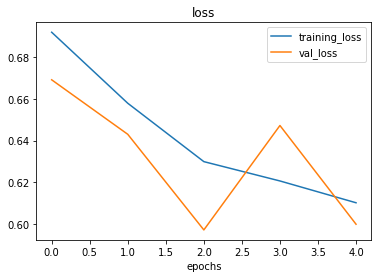

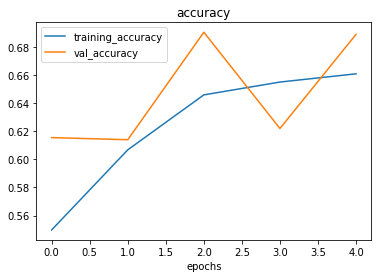

In [10]:
plot_loss_curves(history_1)

## Evaluate baseline model

In [11]:
model_1.evaluate(test_data)

63/63 [==============================] - 7s 118ms/step - loss: 0.6001 - accuracy: 0.6890


[0.6000819802284241, 0.6890000104904175]

# Model 2 - improving the baseline model

Adding more layers (Dense layer with 128 neurons)

## Creating the model 2

In [17]:
# create the model 2
model_2 = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Flatten())

model_2.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [18]:
# compile the model 2
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [19]:
# fit the model 2
history_2 = model_2.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 59s 235ms/step - loss: 0.6811 - accuracy: 0.5657 - val_loss: 0.6607 - val_accuracy: 0.5980
Epoch 2/5
251/251 [==============================] - 52s 206ms/step - loss: 0.6617 - accuracy: 0.6128 - val_loss: 0.6394 - val_accuracy: 0.6305
Epoch 3/5
251/251 [==============================] - 57s 227ms/step - loss: 0.6420 - accuracy: 0.6308 - val_loss: 0.6087 - val_accuracy: 0.6725
Epoch 4/5
251/251 [==============================] - 47s 188ms/step - loss: 0.6278 - accuracy: 0.6395 - val_loss: 0.6238 - val_accuracy: 0.6525
Epoch 5/5
251/251 [==============================] - 48s 191ms/step - loss: 0.6164 - accuracy: 0.6578 - val_loss: 0.6222 - val_accuracy: 0.6455


## Plot loss curves

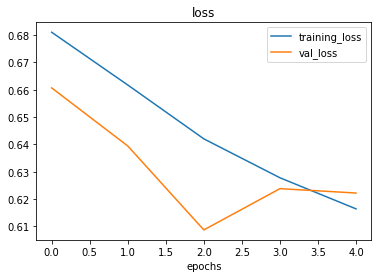

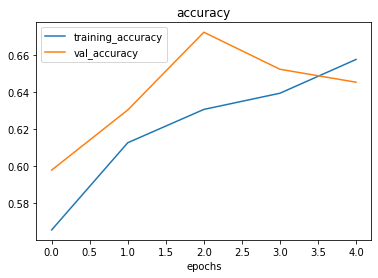

In [20]:
plot_loss_curves(history_2)

## Evaluate the model 2

In [21]:
model_2.evaluate(test_data)

63/63 [==============================] - 8s 122ms/step - loss: 0.6222 - accuracy: 0.6455


[0.6221766471862793, 0.6455000042915344]

# Model 3 - Improvement for the model 2
Adding more filters to the Conv2D layers

## Creating model 3

In [22]:
# create the model 2
model_3 = tf.keras.models.Sequential()

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Flatten())

model_3.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# compile model 3
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [24]:
# fit the model 2
history_3 = model_3.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 48s 189ms/step - loss: 0.6935 - accuracy: 0.5469 - val_loss: 0.6475 - val_accuracy: 0.6060
Epoch 2/5
251/251 [==============================] - 47s 187ms/step - loss: 0.6433 - accuracy: 0.6269 - val_loss: 0.6737 - val_accuracy: 0.6075
Epoch 3/5
251/251 [==============================] - 46s 184ms/step - loss: 0.6199 - accuracy: 0.6538 - val_loss: 0.6085 - val_accuracy: 0.6790
Epoch 4/5
251/251 [==============================] - 46s 184ms/step - loss: 0.6053 - accuracy: 0.6693 - val_loss: 0.5736 - val_accuracy: 0.6965
Epoch 5/5
251/251 [==============================] - 46s 184ms/step - loss: 0.5987 - accuracy: 0.6763 - val_loss: 0.6422 - val_accuracy: 0.6470


## Plot loss curves

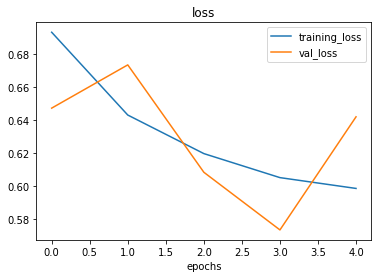

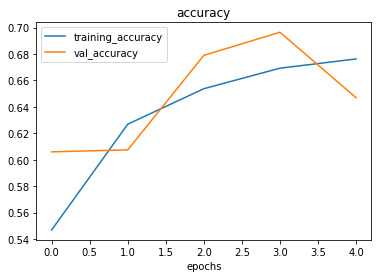

In [25]:
plot_loss_curves(history_3)

## Evaluate the model 3

In [26]:
model_3.evaluate(test_data)

63/63 [==============================] - 8s 120ms/step - loss: 0.6422 - accuracy: 0.6470


[0.6421827673912048, 0.6470000147819519]